In [19]:
"""
  Noise Cancelling
  Author: Seyed Sobhan Hosseini
  Date: Sunday, June 25, 2023, 12:59:09 PM
"""

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [22]:
filename = 'exp-C-Major.wav'

audio, sample_rate = librosa.load('exp-C-Major_1000.wav', sr=1000, mono=True)
audio_np = np.array(audio)

In [23]:
def add_noise(signal, noise_factor):

    noise = np.random.normal(signal, noise_factor)

    scaled_noise = noise / noise_factor

    noisy_signal = scaled_noise 

    return noisy_signal

Text(0.5, 1.0, 'Clean and Noisy Signal')

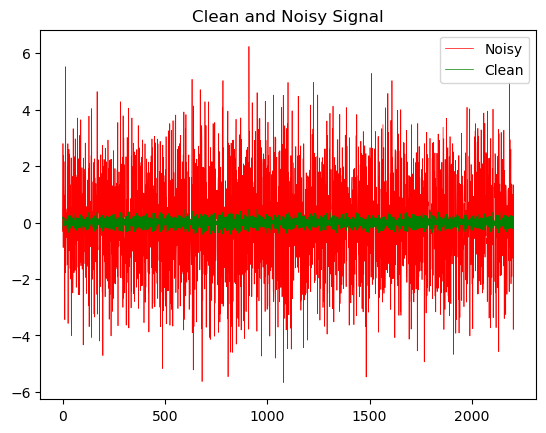

In [24]:
noise_factor = 0.1

noisy_audio = add_noise(audio_np, noise_factor)

plt.plot(noisy_audio,color='r',linewidth=0.5, label='Noisy')
plt.plot(audio_np,color='g',linewidth=0.5,label='Clean')
plt.legend()
plt.title("Clean and Noisy Signal")

In [25]:
def filter_noise(noisy_audio):

    n = len(noisy_audio)
    dt = 1 / n

    fhat = np.fft.fft(noisy_audio)

    PSD = fhat * np.conj(fhat) / n

    freq = (1 / (dt * n)) * np.arange(n)

    L = np.arange(1, np.floor(n/2), dtype='int')

    threshold =  4

    filter = PSD > threshold

    PSDclean = PSD*filter

    fhat = fhat*filter

    ffilt =   np.fft.ifft(fhat)

    filtered_audio =  ffilt.real

    return filtered_audio , PSD[L] , PSDclean[L]

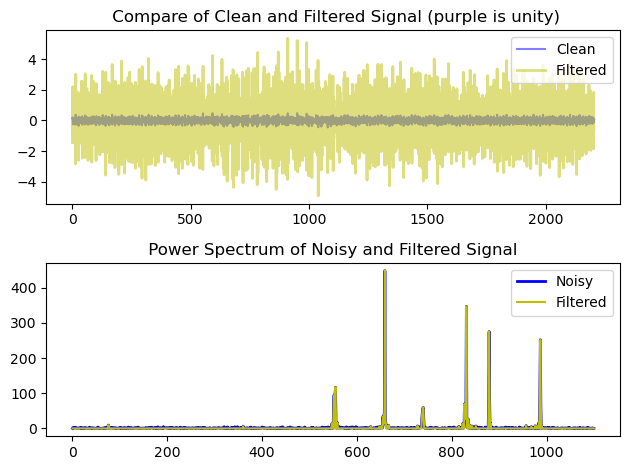

In [26]:
filtered_audio , PSD , PSDclean = filter_noise(noisy_audio)

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(audio_np,color='b',linewidth=1.5,label='Clean',alpha=0.5)
plt.plot(filtered_audio,color='y',linewidth=2,label='Filtered',alpha=0.5)
plt.title(" Compare of Clean and Filtered Signal (purple is unity)")

plt.legend()

plt.sca(axs[1])

plt.plot(PSD,color='b',linewidth=2,label='Noisy')
plt.plot(PSDclean,color='y',linewidth=1.5,label='Filtered')
plt.title(" Power Spectrum of Noisy and Filtered Signal ")

plt.legend()
fig.tight_layout()
plt.show()

In [27]:
from scipy.io.wavfile import write

data = filtered_audio
data = data * (30000/np.max(data))
data = np.resize(data, (len(data),))

write(Name+'_'+str(Student_ID)+'_exp-C-Major_filterd.wav', sample_rate, data.astype(np.int16))